<a href="https://colab.research.google.com/github/Ratnakar2022/Predicting-sentiment-of-COVID-19-tweets/blob/main/Coronavirus_Tweet_Sentiment_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sentiment Analysis : Predicting sentiment of COVID-19 tweets</u></b>

## <b> Problem Description </b>

### This challenge asks you to build a classification model to predict the sentiment of COVID-19 tweets.The tweets have been pulled from Twitter and manual tagging has been done then.

### The names and usernames have been given codes to avoid any privacy concerns.

### You are given the following information:
1. Location
2. Tweet At
3. Original Tweet
4. Label

# **Importing libraries**

In [58]:
import pandas as pd
import numpy as np
import re
import string

#for preprocessing
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

#for ML
from sklearn.metrics import accuracy_score,precision_score,recall_score,classification_report,confusion_matrix,f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer

import warnings
warnings.filterwarnings('ignore')

In [59]:
 # load stop words
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
nltk.download('punkt')
import nltk
nltk.download('averaged_perceptron_tagger')
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

#Loading the Data

In [60]:
#mount the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [61]:
#reading the data
df=pd.read_csv("/content/drive/MyDrive/AlmaBetter/Sentiment Analysis : Predicting sentiment of COVID-19 tweets/Coronavirus Tweet Sentiment Analysis-20221002T085910Z-001/Coronavirus Tweet Sentiment Analysis/Data _ Resources/Coronavirus Tweets.csv",encoding='latin-1')

In [62]:
#Exploring top 5 data
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [63]:
#Exploring bottom 5 data
df.tail()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative
41154,44953,89905,NaN,14-04-2020,You know itÂs getting tough when @KameronWild...,Positive
41155,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral
41156,44955,89907,i love you so much || he/him,14-04-2020,@TartiiCat Well new/used Rift S are going for ...,Negative


In [64]:
#total number of data
df.shape

(41157, 6)

As we can see above we have total 41157 data and 6 column.

In [65]:
# getting summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


Here we get that 4 column is Object data type and 2 column in Int data type. As we wonder how can name can be in INT data type. Well beacuse of user's privacy,the Username and ScreenName is encoded in dataset.

In [66]:
# Check for duplicated entries.
print("Duplicate entry in data:",len(df[df.duplicated()]))

Duplicate entry in data: 0


In [67]:
# Creating Function for Dtype,Unique values and Null values
def datainfo():
    temp_ps = pd.DataFrame(index=df.columns)
    temp_ps['DataType'] = df.dtypes
    temp_ps["Non-null_Values"] = df.count()
    temp_ps['Unique_Values'] = df.nunique()
    temp_ps['NaN_Values'] = df.isnull().sum()
    temp_ps['NaN_Values_Percentage'] = (temp_ps['NaN_Values']/len(df))*100 
    return temp_ps

In [68]:
datainfo()

,DataType,Non-null_Values,Unique_Values,NaN_Values,NaN_Values_Percentage
UserName,int64,41157,41157,0,0.000000
ScreenName,int64,41157,41157,0,0.000000
Location,object,32567,12220,8590,20.871298
TweetAt,object,41157,30,0,0.000000
OriginalTweet,object,41157,41157,0,0.000000
Sentiment,object,41157,5,0,0.000000


Here is the all information about dataset. Null value is not there in any column except location column.

In [69]:
# statistics info
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
UserName,41157.0,NaN,NaN,NaN,24377.0,11881.146851,3799.0,14088.0,24377.0,34666.0,44955.0
ScreenName,41157.0,NaN,NaN,NaN,69329.0,11881.146851,48751.0,59040.0,69329.0,79618.0,89907.0
Location,32567,12220,London,540,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TweetAt,41157,30,20-03-2020,3448,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OriginalTweet,41157,41157,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sentiment,41157,5,Positive,11422,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Describe works only for numeric data. here is every column have Object dat type.
Beacuse of user's privacy,the Username and ScreenName is encoded as Integer in dataset.so that min max does not work for us here.



# Exploratory Analysis and Visualization

In [70]:
# Getting unique values of 'TweetAt' column

df['TweetAt'].unique() 

array(['16-03-2020', '17-03-2020', '18-03-2020', '19-03-2020',
       '20-03-2020', '21-03-2020', '22-03-2020', '23-03-2020',
       '24-03-2020', '25-03-2020', '26-03-2020', '27-03-2020',
       '28-03-2020', '29-03-2020', '30-03-2020', '31-03-2020',
       '01-04-2020', '02-04-2020', '03-04-2020', '04-04-2020',
       '05-04-2020', '06-04-2020', '07-04-2020', '08-04-2020',
       '09-04-2020', '10-04-2020', '11-04-2020', '12-04-2020',
       '13-04-2020', '14-04-2020'], dtype=object)

In [71]:
# function to change the string format to date

from datetime import datetime

def change_to_timestamp(column):
  return datetime.strptime(column, '%d-%m-%Y')

In [72]:
# applying the above function to 'TweetAt' column

df['TweetAt'] = df['TweetAt'].apply(change_to_timestamp)


In [73]:
# getting the month number from 'TweetAt' column

df['TweetMonth'] = df['TweetAt'].apply(lambda x : x.month)

In [ ]:
df['TweetAt'][0]

In [74]:
# filling null values in 'Location' column

df["Location"].fillna(df['Location'].mode().iloc[0],inplace=True)

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   UserName       41157 non-null  int64         
 1   ScreenName     41157 non-null  int64         
 2   Location       41157 non-null  object        
 3   TweetAt        41157 non-null  datetime64[ns]
 4   OriginalTweet  41157 non-null  object        
 5   Sentiment      41157 non-null  object        
 6   TweetMonth     41157 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 2.2+ MB


Now we can see that no null value is coming in Location column

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Tweets distributions')

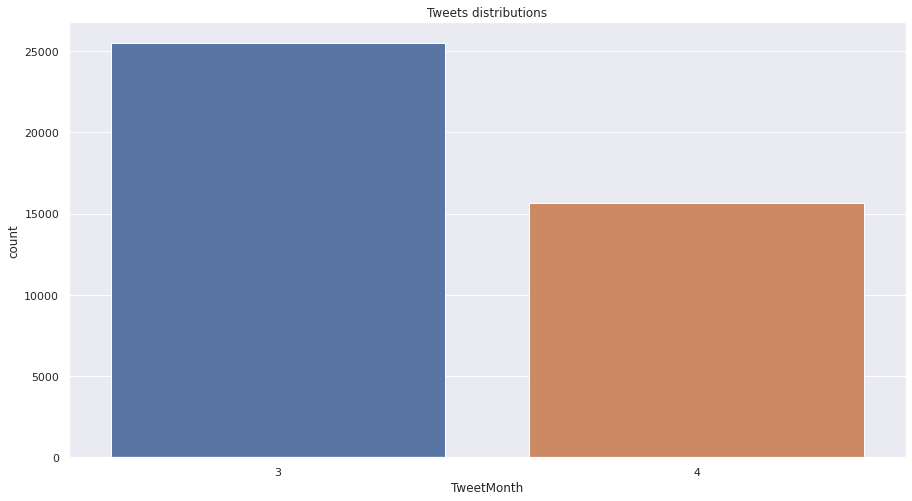

In [77]:
# getting count of months 3 and 4 

sns.set(rc={'figure.figsize':(15,8)})
sns.countplot(x=df['TweetMonth'])
plt.title('Tweets distributions')

We can see the above graph that more tweet was tweeted in month of March.

In [78]:
# getting differant dates from the unique months

list_of_month_3 = []
list_of_month_4 = []
for i in range(len(df['TweetAt'])):
  if df['TweetAt'][i].month == 3:
    list_of_month_3.append(df['TweetAt'][i].day)
  if df['TweetAt'][i].month == 4:
    list_of_month_4.append(df['TweetAt'][i].day) 

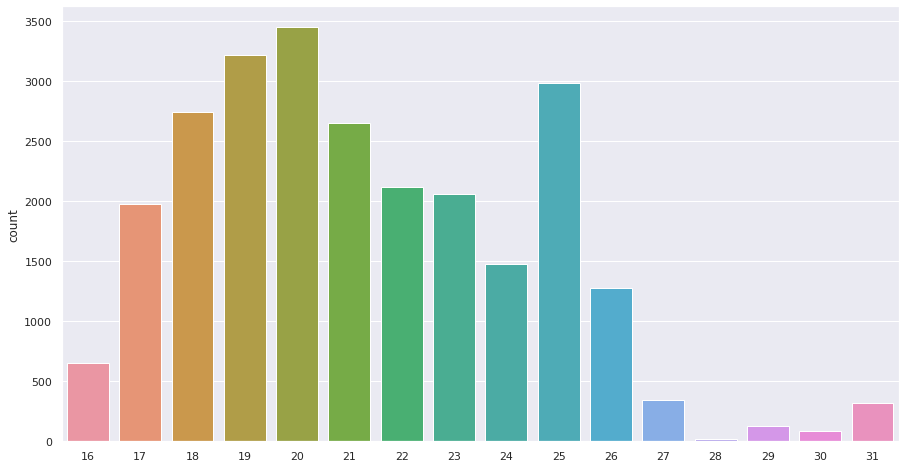

In [79]:
# plotting the frequency of the tweets from month 3 (march)

sns.countplot(x=list_of_month_3)

As we can see that above graph users were most active between 17/03 to 26/03

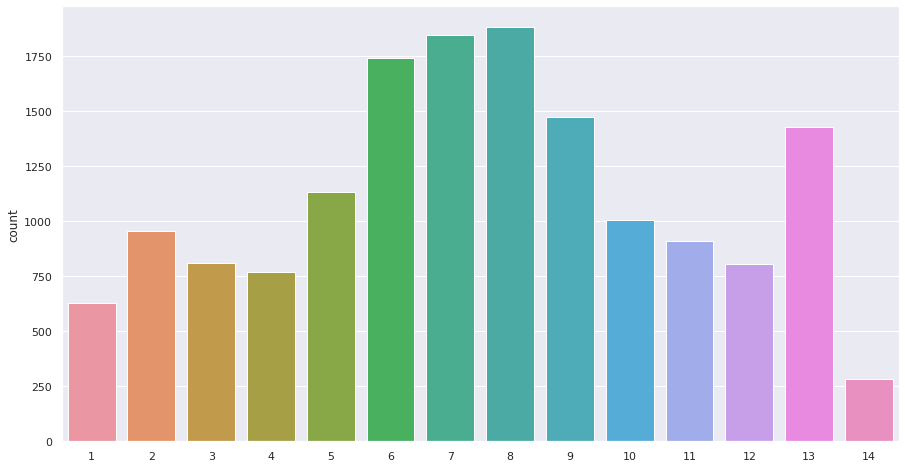

In [80]:
# plotting the frequency of the tweets from month 4 (april)

sns.countplot(x=list_of_month_4)

Here we can see Users were most active between 06/04 to 09/04

Text(0.5, 1.0, 'Sentiment distributions')

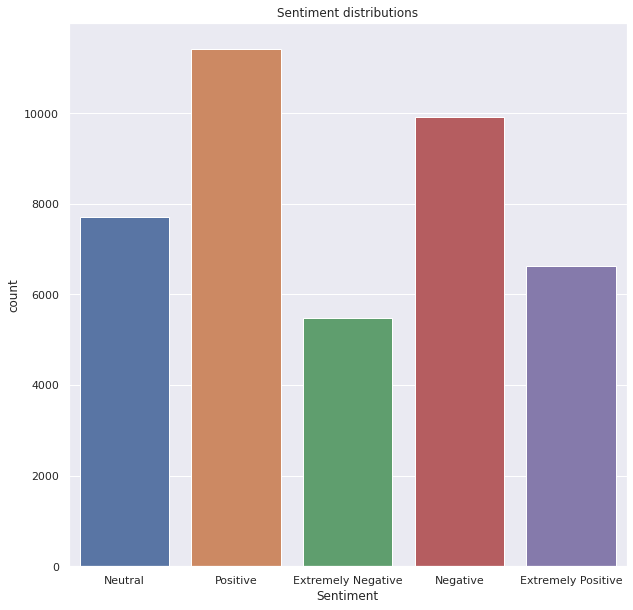

In [81]:
# Plotting different sentiment distributions

plt.figure(figsize=(10,10))
sns.countplot(x=df['Sentiment'])
plt.title('Sentiment distributions')

Above graph shows that the count of positive tweets are highest and extremely negative tweets are very less.



In [82]:
analysis_1= df.groupby("Sentiment").count()['OriginalTweet'].reset_index().sort_values(by='OriginalTweet',ascending=False)
analysis_1

,Sentiment,OriginalTweet
4,Positive,11422
2,Negative,9917
3,Neutral,7713
1,Extremely Positive,6624
0,Extremely Negative,5481


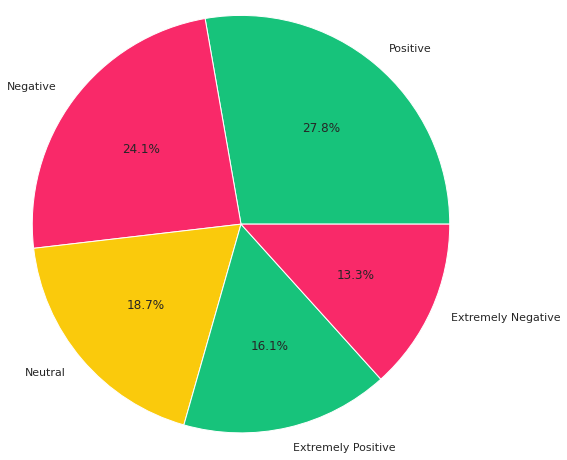

In [83]:
# count plot on Sentiment categorical variable
percent_class = analysis_1['OriginalTweet']
labels= analysis_1.Sentiment
colors = ['#17C37B','#F92969','#FACA0C']
fig=plt.pie(percent_class,labels=labels,colors=colors,autopct="%.1f%%",radius =1.2)

In [84]:
# sneak peek of positive, negative and neutral tweets
list(df.loc[df["Sentiment"]=='Negative','OriginalTweet'])[0]


"For corona prevention,we should stop to buy things with the cash and should use online payment methods because corona can spread through the notes. Also we should prefer online shopping from our home. It's time to fight against COVID 19?. #govindia #IndiaFightsCorona"

In [85]:
list(df.loc[df["Sentiment"]=='Positive','OriginalTweet'])[0]


'advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order'

In [86]:
list(df.loc[df["Sentiment"]=='Neutral','OriginalTweet'])[0]


'@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8'

In [88]:
Top_Location_Of_tweet= df['Location'].value_counts().head(10)

In [87]:
# dataframe containing locations and their tweet counts  

Top_Location_Of_tweet_df=pd.DataFrame(Top_Location_Of_tweet)
Top_Location_Of_tweet_df.reset_index(inplace=True)
Top_Location_Of_tweet_df.rename(columns={'index':'Location', 'Location':'Location_Count'}, inplace=True)
Top_Location_Of_tweet_df

,Location,Location_Count
0,London,9130
1,United States,528
2,"London, England",520
3,"New York, NY",395
4,"Washington, DC",373
5,United Kingdom,337
6,"Los Angeles, CA",281
7,India,268
8,UK,232
9,Australia,225


London is the place from where most tweets were made.

In [89]:
# dataframe containing dates and tweet counts in the month of march

date_count = df.groupby("TweetAt").count()["OriginalTweet"]
date_count_df = pd.DataFrame(date_count)
date_count_df.sort_values(by=['OriginalTweet'],ascending=False).head(10)

,OriginalTweet
TweetAt,
2020-03-20,3448
2020-03-19,3215
2020-03-25,2979
2020-03-18,2742
2020-03-21,2653
2020-03-22,2114
2020-03-23,2062
2020-03-17,1977
2020-04-08,1881


On 20/03 most tweets were made.

In [90]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,TweetMonth
0,3799,48751,London,2020-03-16,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,3
1,3800,48752,UK,2020-03-16,advice Talk to your neighbours family to excha...,Positive,3
2,3801,48753,Vagabonds,2020-03-16,Coronavirus Australia: Woolworths to give elde...,Positive,3
3,3802,48754,London,2020-03-16,My food stock is not the only one which is emp...,Positive,3
4,3803,48755,London,2020-03-16,"Me, ready to go at supermarket during the #COV...",Extremely Negative,3


In [91]:
len(list(df['UserName'].unique()))

41157

**Word cloud for negative statements**

In [92]:
neg_phrases = df[df.Sentiment == 'Negative']
neg_words = []
for t in neg_phrases.OriginalTweet:
    neg_words.append(t)
neg_words[:4]

["For corona prevention,we should stop to buy things with the cash and should use online payment methods because corona can spread through the notes. Also we should prefer online shopping from our home. It's time to fight against COVID 19?. #govindia #IndiaFightsCorona",
 '@10DowningStreet @grantshapps what is being done to ensure food and other essential products are being re-stocked at supermarkets and panic buying actively discouraged? It cannot be left to checkout staff to police the actions of the selfish and profiteer',
 'In preparation for higher demand and a potential food shortage, The Hunger Coalition purchased 10 percent more food and implemented new protocols due to the COVID-19 coronavirus. https://t.co/5CecYtLnYn',
 'Do you see malicious price increases in NYC? The NYC Department of Consumer and Worker Protection (DCWP) has set up a page to digitally file a complaint. Click here: https://t.co/oEx6Y8mm2K\r\r\n\r\r\nTo file a complaint (use the word"Overcharge") https://t.c

In [93]:
neg_text = pd.Series(neg_words).str.cat(sep=' ')
neg_text[:100]

'For corona prevention,we should stop to buy things with the cash and should use online payment metho'

In [94]:
for t in neg_phrases.OriginalTweet[:300]:
    if 'good' in t:
        print(t)




#Covid_19 https://t.co/pzirO10avf
People seen stocking up on goods into trolleys after the panic buying rumours spread today at hypermarket in Kajang March 16 2020 Picture by Shafwan Zaidon



yet, Korea's supermarket never out of stock while Malaysia.....empty shelf here and there. The government should totally consider on limiting some necessity goods to every consumer in the market.
@nytopinion @McDonalds @SUBWAY @ChickfilA @CrackerBarrel @Outback @Cheesecake You asked the workers, we asked the restaurants! HereÂs what the top 20 are offering during the outbreak (hint: itÂs not good): https://t.co/e2ZNXajPre

#CoronavirusOutbreak #coronavirus #CoronaVirusUpdates #panicbuying #COVID2019 #COVID19 #COVID?19 #Repost #QuarantineLife #QuarantineAndChill #SocialDistance #StayTheFHome #Corona #wtf https://t.co/yQrUtMwgw9








Thread ?
Seattle to provide $800 in supermarket vouchers to thousands of families during coronavirus crisis, mayor says https://t.co/jupy1W34KK to more than 6,

In [95]:
pos_phrases = df[df.Sentiment == "Positive"] ## 4 is positive sentiment
pos_string = []
for t in pos_phrases.OriginalTweet:
    pos_string.append(t)
pos_text = pd.Series(pos_string).str.cat(sep=' ')
pos_text[:100]

'advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbe'

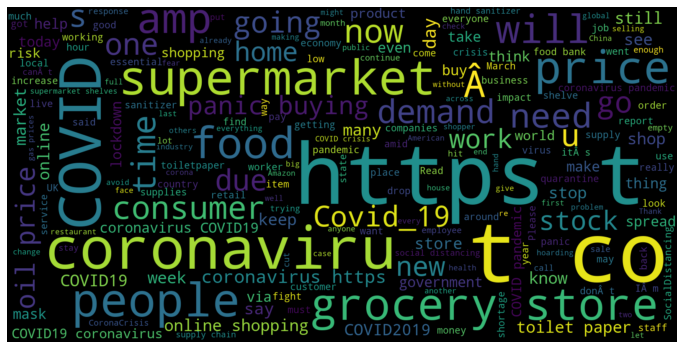

In [96]:
# Extracting word cloud for negative statements

from wordcloud import WordCloud
wordcloud = WordCloud(width=1600, height=800, max_font_size=200).generate(neg_text)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**Word Cloud for Positive Statements**

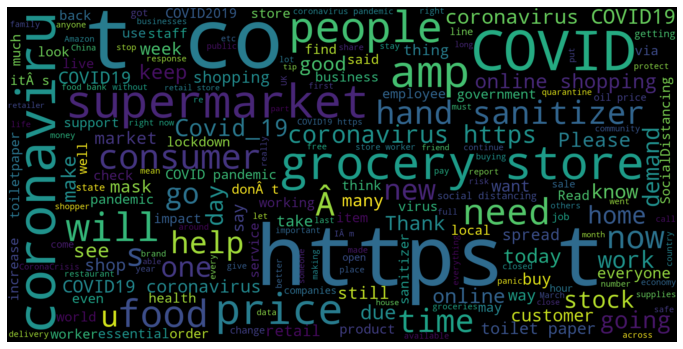

In [97]:
# Extracting word cloud for positive statements

wordcloud = WordCloud(width=1600, height=800, max_font_size=200).generate(pos_text)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [98]:
# copying the data to use on other methods
df1=df.copy()
DF= df.copy()

# Method 1: Tf-Idf Approach

**Preprocessing data **

In [99]:
# dropping irrelevant columns from the dataset

df1.drop(['UserName','ScreenName','Location','TweetAt'],axis=1,inplace=True)

In [100]:
# function to preprocess the data

def preprocessing_text(data):
  data =data.lower()
  data = re.sub(r'http\S+|www\S+|https\S',' ',data,flags=re.MULTILINE)
  data = data.translate(str.maketrans('','',string.punctuation))
  data = re.sub(r'\@\w+|\#'," ", data)
  data_token = word_tokenize(data)
  filtered_words = [word for word in data_token if word not in stop_words]
  ps = PorterStemmer()
  stemmed_words = [ps.stem(w) for w in filtered_words]
  lemmatizer = WordNetLemmatizer()
  lemma_words = [lemmatizer.lemmatize(w,pos='a') for w in stemmed_words]
  return ' '.join(lemma_words)

In [102]:
# applying the above function
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [104]:
df1['Processed_text'] = df1['OriginalTweet'].apply(preprocessing_text)


In [106]:
df1.head()

,OriginalTweet,Sentiment,TweetMonth,Processed_text
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,3,menyrbi philgahan chrisitv
1,advice Talk to your neighbours family to excha...,Positive,3,advic talk neighbour famili exchang phone numb...
2,Coronavirus Australia: Woolworths to give elde...,Positive,3,coronaviru australia woolworth give elderli di...
3,My food stock is not the only one which is emp...,Positive,3,food stock one empti pleas dont panic enough f...
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative,3,readi go supermarket covid19 outbreak im paran...


In [107]:
# Extracting unique sentiments 

df1['Sentiment'].unique()

array(['Neutral', 'Positive', 'Extremely Negative', 'Negative',
       'Extremely Positive'], dtype=object)

In [108]:
# Encoding and simplifying sentiments

encoders_nums = {"Sentiment":{"Neutral": 'Neutral' ,"Positive": 'Positive','Extremely Negative':'Negative','Extremely Positive':'Positive','Negative':'Negative'}}
df1 = df1.replace(encoders_nums)

In [110]:
df1['Sentiment'].unique()

array(['Neutral', 'Positive', 'Negative'], dtype=object)

# Model Training

In [111]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# TF-IDF feature matrix
tfidf = tfidf_vectorizer.fit_transform(df['Processed_text'])
tfidf

<41157x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 459294 stored elements in Compressed Sparse Row format>

In [112]:
# Assigning dependent and independent variables

x = df.Processed_text
y = df.Sentiment

# splitting data into train and test sets

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.1,random_state = 225)
print('x_train: ',len(x_train))
print('x_test: ',len(x_test))
print('y_train: ',len(y_train))
print('y_test: ',len(y_test))

x_train:  37041
x_test:  4116
y_train:  37041
y_test:  4116


In [113]:
tvec = TfidfVectorizer()
clf2 = LogisticRegression(solver = 'lbfgs')

In [114]:
from sklearn.pipeline import Pipeline

In [115]:
# training model

model = Pipeline([('vectorizer',tvec),('classifier',clf2)])
model.fit(x_train,y_train)


Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', LogisticRegression())])

In [117]:
from sklearn.metrics import confusion_matrix

In [118]:
# Getting predictions on train and test sets

predictions = model.predict(x_test)
prediction_train = model.predict(x_train)

[Text(0, 0.5, 'neutral'), Text(0, 1.5, 'positive'), Text(0, 2.5, 'negative')]

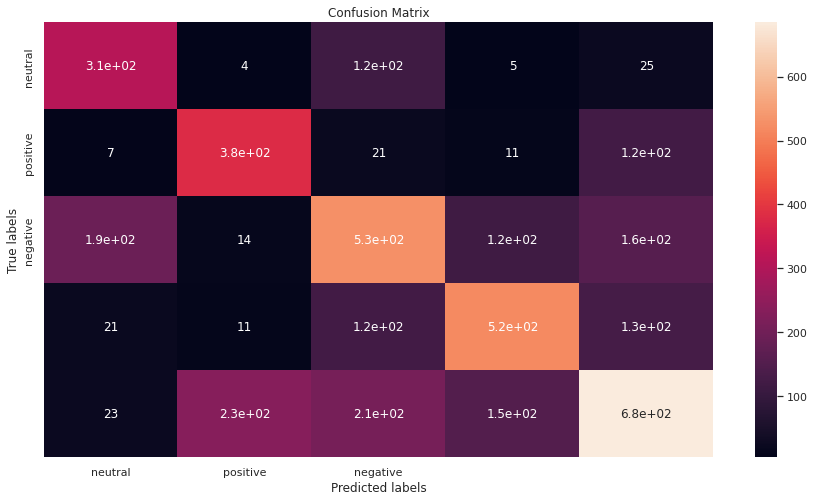

In [119]:
# Extracting confusion matrix for test predictions

cm_test = confusion_matrix(predictions,y_test)
ax= plt.subplot()
sns.heatmap(cm_test, annot=True, ax = ax) #annot=True to annotate cells
labels = ['neutral', 'positive','negative']
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[Text(0, 0.5, 'neutral'), Text(0, 1.5, 'positive'), Text(0, 2.5, 'negative')]

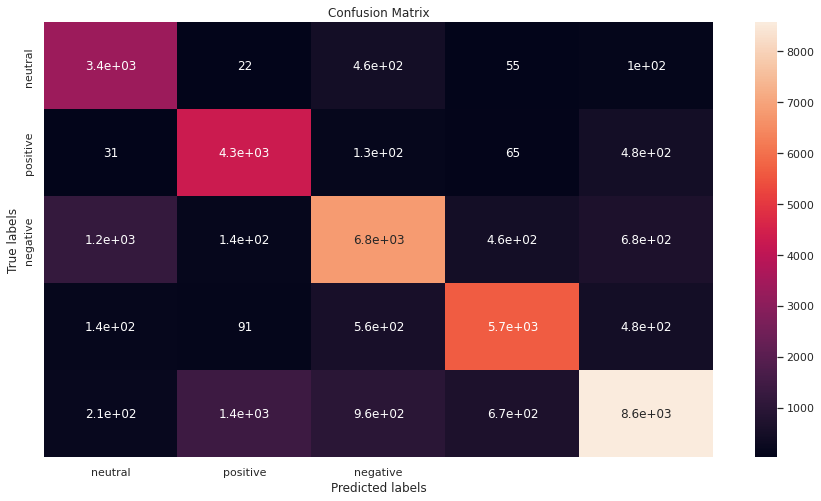

In [120]:
# Extracting confusion matrix for train predictions

cm_train = confusion_matrix(prediction_train,y_train)
ax= plt.subplot()
sns.heatmap(cm_train, annot=True, ax = ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [121]:
# Getting differant metrics for train set

print('Accuracy score of train set: ',accuracy_score(prediction_train,y_train))
print('Precission of train set: ',precision_score(prediction_train,y_train, average = 'weighted'))
print('Recall of train set: ',recall_score(prediction_train,y_train, average = 'weighted'))

Accuracy score of train set:  0.7745741205690991
Precission of train set:  0.7805284716193664
Recall of train set:  0.7745741205690991


In [122]:
# Getting differant metrics for test set

print('Accuracy score of test set: ',accuracy_score(predictions,y_test))
print('Precission of test set: ',precision_score(predictions,y_test, average = 'weighted'))
print('Recall of test set: ',recall_score(predictions,y_test, average = 'weighted'))

Accuracy score of test set:  0.5891642371234208
Precission of test set:  0.5906854736535562
Recall of test set:  0.5891642371234208


In [123]:
# Getiing classification report for train and test sets
print('Test set report')
print("\n")
print(classification_report(y_test,predictions))
print("\n")
print('Train set report')
print("\n")
print(classification_report(y_train,prediction_train))

Test set report


                    precision    recall  f1-score   support

Extremely Negative       0.67      0.56      0.61       553
Extremely Positive       0.70      0.59      0.64       644
          Negative       0.52      0.53      0.53       999
           Neutral       0.65      0.65      0.65       803
          Positive       0.53      0.61      0.57      1117

          accuracy                           0.59      4116
         macro avg       0.61      0.59      0.60      4116
      weighted avg       0.60      0.59      0.59      4116



Train set report


                    precision    recall  f1-score   support

Extremely Negative       0.84      0.68      0.75      4928
Extremely Positive       0.86      0.72      0.78      5980
          Negative       0.73      0.76      0.75      8918
           Neutral       0.82      0.82      0.82      6910
          Positive       0.72      0.83      0.77     10305

          accuracy                           0.77     37

# Try Example

In [124]:
example = ['Today is a good day']
result = model.predict(example)
print(result)

['Extremely Positive']


# Model Saving as Pickle file

In [131]:
import pickle
 
filename = 'sentiment_analysis'
pickle.dump(model,open(filename,'wb'))

# Method 2 : CountVectorizer Approach

**Data Preparation**

In [ ]:
####### code to remove unimportant text from the data #######

list_of_tweets = []
b = []
c = []
for i in range(len(DF['OriginalTweet'])):
  a = DF['OriginalTweet'][i].split(' ')
  for j in a:
    if 'https' in j:
      pass
    else:
      b.append(j) 
  c.append(' '.join(b))
  b = []
for l in c:
  list_of_tweets.append(l) 

# assigning 'OriginalTweet' column to the above list

DF['OriginalTweet'] = list_of_tweets

# downloading stopwords

import nltk
nltk.download('stopwords')

import string
from nltk.corpus import stopwords

# function to remove punctuations and stopwords

def text_process(msg):
    nopunc =[char for char in msg if char not in string.punctuation]
    nopunc=''.join(nopunc)
    return ' '.join([word for word in nopunc.split() if word.lower() not in stopwords.words('english')])

# processing the text 

DF['OriginalTweet'] = DF['OriginalTweet'].apply(lambda x : text_process(x))


# changing the values in the data accordingly

for i in range(len(DF['Sentiment'])):
  if DF['Sentiment'][i] == 'Extremely Negative':
    DF['Sentiment'][i] = 'Negative'
  elif DF['Sentiment'][i] == 'Extremely Positive':
    DF['Sentiment'][i] = 'Positive'

# providing necessary class values

''' for negative values = -1
        Positive values = 1   
        neutral values = 0 '''

for i in range(len(df['Sentiment'])):
  if DF['Sentiment'][i] == 'Negative':
    DF['Sentiment'][i] = -1
  elif DF['Sentiment'][i] == 'Positive':
    DF['Sentiment'][i] = 1
  elif DF['Sentiment'][i] == 'Neutral': 
    DF['Sentiment'][i] = 0

# create an object of stemming function
stemmer = SnowballStemmer("english")

def stemming(text):    
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text) 

# applying stemming function

DF['OriginalTweet'] = DF['OriginalTweet'].apply(stemming)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
